In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os # 因為要建立資料夾
from tensorflow.keras.models import Sequential # CNN 建立空模函式
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D # CNN 函式
from tensorflow.python.keras.utils import np_utils # 層

In [ ]:
# 掛載雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 訓練資料

In [ ]:
import os
path = '/content/drive/MyDrive/聯成電腦/project/photos/train'
files = os.listdir(path)
directories = list()

In [ ]:
for dir in files:
  if os.path.isdir(os.path.join(path, dir)):
    directories.append(dir)
directories

['苦瓜', '西瓜', '南瓜', '冬瓜', '木瓜', '哈密瓜', '小黃瓜', '絲瓜', '櫛瓜', '瓠瓜']

In [ ]:
def resizeFile(dir_path, img_files): # dir_path 某個水果資料夾 img_files 資料夾中的所有檔案
  size = (250, 250)
  for item in img_files:

    item = os.path.join(dir_path, item)

    images = cv2.imread(item)
    # :2 兩通道
    h, w = images.shape[:2]
    # 找最大邊
    if h > size[0] or w > size[1]:
      # 找出最大比例 => 等比例縮小
      ratio = max(h/size[0], w/size[1])
      images = cv2.resize(images, (int(w/ratio), int(h/ratio)))
      # 重新抓取新的寬、高
    h, w = images.shape[:2]
    # 高度的黑邊
    pad_h = size[0]-h
    # 寬度的黑邊
    pad_w = size[1]-w
    # 上、下補黑邊的高度
    top, bottom = pad_h//2, pad_h-(pad_h//2)
    # 左、右補黑邊的寬度
    left, right = pad_w//2, pad_w-(pad_w//2)
    # 補黑邊(填充：適用於圖片縮小時)
    images = cv2.copyMakeBorder(images, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0,0,0])
    # 抓檔名
    name = item.split('/')[-1]
    # 用程式判斷是否有所需的資料夾

    cv2.imwrite(f"{dir_path}/resize_color/{name}", images)

In [ ]:
x_train = list()
y_train = list()

def create_data(path, category):
  for p in os.listdir(path):
    # 轉灰階
    #img_array = cv2.imread(os.path.join(path, p), 0)
    img_array = cv2.imread(os.path.join(path, p))
    # 訓練題目
    x_train.append(img_array)
    # 訓練答案
    y_train.append(category)

In [ ]:
category = 0
categoryD = {}
for directory in directories:
  dir_path = os.path.join(path, directory)
  # 目錄中的所有檔案
  dir_file = os.listdir(dir_path)
  img_files = list()
  for file in dir_file:
    # 如附檔名為這三種的任何一種
    if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
      img_files.append(file)
  resizeDir = os.path.join(dir_path, 'resize_color')
  if not os.path.exists(resizeDir):
    os.makedirs(resizeDir)
    resizeFile(dir_path, img_files)
  # 分類
  create_data(resizeDir, category)
  categoryD[category]=directory
  category += 1


In [ ]:
len(x_train)

1475

In [ ]:
len(y_train)

1475

array([[[246, 246, 246],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [254, 252, 251],
        [253, 251, 250],
        [253, 251, 250]],

       [[246, 246, 246],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [254, 252, 251],
        [253, 251, 250],
        [253, 251, 250]],

       [[246, 246, 246],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [254, 252, 251],
        [253, 251, 250],
        [253, 251, 250]],

       ...,

       [[247, 247, 247],
        [255, 255, 255],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 247, 247],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 247, 247],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
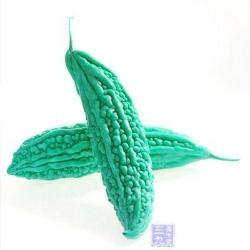

In [ ]:
x_train[0]

# 測試資料

In [ ]:
import os
test_path = '/content/drive/MyDrive/聯成電腦/project/photos/test'
test_files = os.listdir(test_path)
test_directories = list()

In [ ]:
for dir in test_files:
  if os.path.isdir(os.path.join(test_path, dir)):
    test_directories.append(dir)
test_directories

['小黃瓜', '苦瓜', '木瓜', '南瓜', '冬瓜', '西瓜', '哈密瓜', '瓠瓜', '絲瓜', '櫛瓜']

In [ ]:
x_test = list()
y_test = list()

def create_testdata(path, category):
  for p in os.listdir(path):
    # 轉灰階
    #img_array = cv2.imread(os.path.join(path, p), 0)
    img_array = cv2.imread(os.path.join(path, p))
    # 訓練題目
    x_test.append(img_array)
    # 訓練答案
    y_test.append(category)

In [ ]:
test_categoryD = {}
for directory in test_directories:
  dir_path = os.path.join(test_path, directory)
  # 目錄中的所有檔案
  dir_file = os.listdir(dir_path)
  img_files = list()
  for file in dir_file:
    # 如附檔名為這三種的任何一種
    if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
      img_files.append(file)
  resizeDir = os.path.join(dir_path, 'resize_color')
  if not os.path.exists(resizeDir):
    os.makedirs(resizeDir)
    resizeFile(dir_path, img_files)

  for categoryN, values in categoryD.items():
    if values == directory:
      test_categoryD[categoryN] = directory
      # 分類
      create_testdata(resizeDir, categoryN)
test_categoryD

{6: '小黃瓜',
 0: '苦瓜',
 4: '木瓜',
 2: '南瓜',
 3: '冬瓜',
 1: '西瓜',
 5: '哈密瓜',
 9: '瓠瓜',
 7: '絲瓜',
 8: '櫛瓜'}

# 打散成組的資料

In [ ]:
# 彩色圖使用
x_train = np.array(x_train)
x_train = x_train / 255
y_train = np_utils.to_categorical(y_train)

x_test = np.array(x_test)
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test)

In [ ]:
len(x_train)

1475

In [ ]:
len(y_train)

1475

In [ ]:
x_train.shape

(1475, 250, 250, 3)

# 打亂資料群

In [ ]:
from sklearn.model_selection import train_test_split
# 訓練
rX_train, rX_test, ry_train, ry_test = train_test_split(x_train, y_train, test_size=1, random_state=1)
# 測試
raX_train, raX_test, ray_train, ray_test = train_test_split(x_test, y_test, test_size=1, random_state=1)

# 建模

In [ ]:
model = Sequential()

In [ ]:
# 卷積
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
# 池化
model.add(MaxPooling2D(pool_size=(2,2))) # pool_size=(2,2) 為預設，不寫也可以
# 卷積
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
# 池化
model.add(MaxPooling2D(pool_size=(2,2)))
# 卷積
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
# 池化
model.add(MaxPooling2D(pool_size=(2,2)))
# 放棄的比率
#model.add(Dropout(0.3))
# 扁平化
model.add(Flatten())
# 放棄的比率
model.add(Dropout(0.2))
# 連接層：通常用1024(三通道 32*32*32)
model.add(Dense(512, activation='relu'))
# 輸出層：10種分類
model.add(Dense(10, activation='softmax'))

# 編譯(程式)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練

In [ ]:
model.fit(rX_train, ry_train, epochs=15, batch_size=64, validation_data=(raX_train, ray_train))

Epoch 1/15
24/24 [==============================] - 9s 111ms/step - loss: 3.2425 - accuracy: 0.2062 - val_loss: 1.9754 - val_accuracy: 0.2604
Epoch 2/15
24/24 [==============================] - 1s 58ms/step - loss: 1.7768 - accuracy: 0.3474 - val_loss: 1.7665 - val_accuracy: 0.3580
Epoch 3/15
24/24 [==============================] - 1s 59ms/step - loss: 1.4909 - accuracy: 0.4586 - val_loss: 1.4046 - val_accuracy: 0.5030
Epoch 4/15
24/24 [==============================] - 1s 58ms/step - loss: 1.2636 - accuracy: 0.5638 - val_loss: 1.6275 - val_accuracy: 0.4793
Epoch 5/15
24/24 [==============================] - 1s 58ms/step - loss: 1.1032 - accuracy: 0.6214 - val_loss: 1.2399 - val_accuracy: 0.5592
Epoch 6/15
24/24 [==============================] - 1s 59ms/step - loss: 0.9387 - accuracy: 0.6771 - val_loss: 1.0873 - val_accuracy: 0.6627
Epoch 7/15
24/24 [==============================] - 1s 59ms/step - loss: 0.6930 - accuracy: 0.7626 - val_loss: 1.0322 - val_accuracy: 0.6982
Epoch 8/15
2

# 測試

In [ ]:
predict1 = model.predict(x_train)

47/47 [==============================] - 1s 14ms/step


In [ ]:
predict2 = model.predict(x_test)

11/11 [==============================] - 0s 28ms/step


In [ ]:
right = 0
for i in range(len(predict1)):
  ans = np.argmax(predict1[i])
  pre = y_train[i][ans]
  if pre == 1:
    right += 1
right / len(predict1)

0.9891525423728813

In [ ]:
right = 0
for i in range(len(predict2)):
  ans = np.argmax(predict2[i])
  pre = y_test[i][ans]
  if pre == 1:
    right += 1
right / len(predict2)

0.831858407079646

In [3]:
import os
from google.colab import files

In [2]:
def upload():
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print('上傳成功')
  return name

In [6]:
name = upload()

Saving cuccumber.jpg to cuccumber.jpg
上傳成功


In [9]:
X_test = list()
path = '/content'
img_arr = cv2.imread(os.path.join(path, name))
new_img = cv2.resize(img_arr, dsize=(250,250))
X_test.append(new_img)

X_test = np.array(X_test)
X_test = X_test / 255

In [10]:
pre = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
np.argmax(pre[0])

5

array([[[247, 239, 226],
        [251, 243, 230],
        [245, 237, 224],
        ...,
        [219, 206, 190],
        [218, 205, 189],
        [219, 206, 190]],

       [[247, 239, 226],
        [251, 243, 230],
        [245, 237, 224],
        ...,
        [222, 209, 193],
        [220, 207, 191],
        [218, 205, 189]],

       [[248, 239, 227],
        [252, 243, 230],
        [246, 238, 225],
        ...,
        [226, 213, 197],
        [222, 209, 193],
        [218, 205, 189]],

       ...,

       [[240, 227, 211],
        [240, 227, 211],
        [224, 211, 195],
        ...,
        [234, 220, 211],
        [229, 215, 206],
        [223, 209, 200]],

       [[239, 226, 210],
        [243, 230, 214],
        [223, 210, 194],
        ...,
        [231, 217, 208],
        [233, 219, 210],
        [227, 213, 204]],

       [[238, 225, 209],
        [245, 232, 216],
        [222, 210, 194],
        ...,
        [229, 215, 206],
        [236, 222, 213],
        [229, 216, 207]]], dtype=uint8)
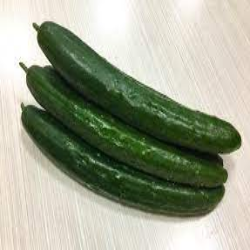

In [11]:
new_img[:,:,[2,1,0]]